In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
dataset = load_iris()
columns_name = dataset.feature_names
x = dataset.data
t = dataset.target

In [3]:
df = pd.DataFrame(data = x, columns = columns_name)
df['Target'] = t
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
np.unique(t)

array([0, 1, 2])

In [5]:
x.shape, t.shape

((150, 4), (150,))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 0)

In [8]:
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [9]:
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


In [10]:
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [11]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

In [12]:
graph_tree = graphviz.Source(dot_data)

In [13]:
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

<BarContainer object of 4 artists>

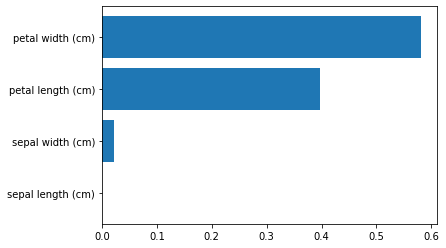

In [14]:
y = columns_name
width = feature_importance
plt.barh(y = y, width = width)

In [15]:
from sklearn.svm import SVC
svc = SVC()

In [16]:
svc.fit(x_train, t_train)

SVC()

In [17]:
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
std_scaler.fit(x_train)

StandardScaler()

In [20]:
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [21]:
round(x_train_std.mean())

0

In [22]:
round(x_train_std.std())

1

In [23]:
svc_std = SVC()

In [24]:
svc_std.fit(x_train_std, t_train)

SVC()

In [25]:
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C = 1.0)

In [27]:
log_reg.fit(x_train, t_train)

LogisticRegression()

In [28]:
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.9809523809523809
test score :  0.9777777777777777


In [29]:
log_reg.coef_

array([[-0.39765925,  0.83421173, -2.28946117, -0.97844057],
       [ 0.54460765, -0.29081826, -0.232645  , -0.65832227],
       [-0.14694841, -0.54339348,  2.52210616,  1.63676284]])

In [30]:
log_reg.intercept_

array([  8.99766759,   1.54372138, -10.54138897])

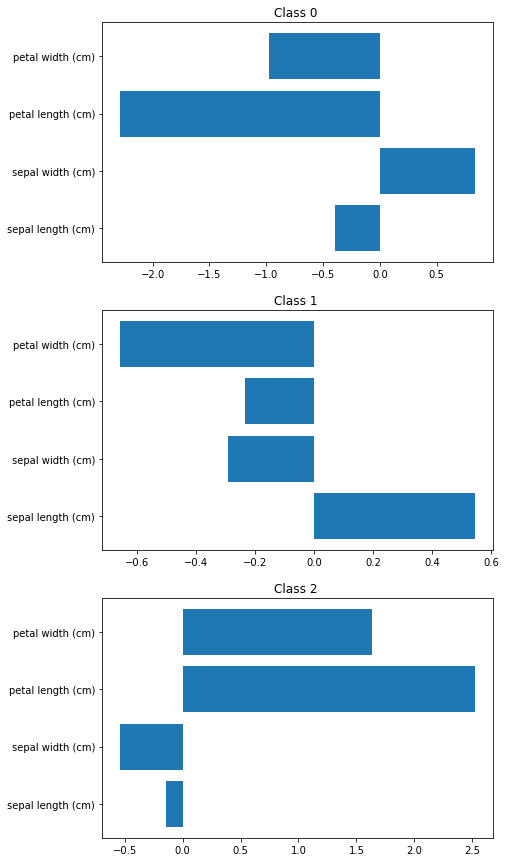

In [31]:
fig = plt.figure(figsize = (7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i + 1)
    ax.barh(y = dataset.feature_names, width = log_reg.coef_[i])
    ax.set_title('Class {} '.format(i))

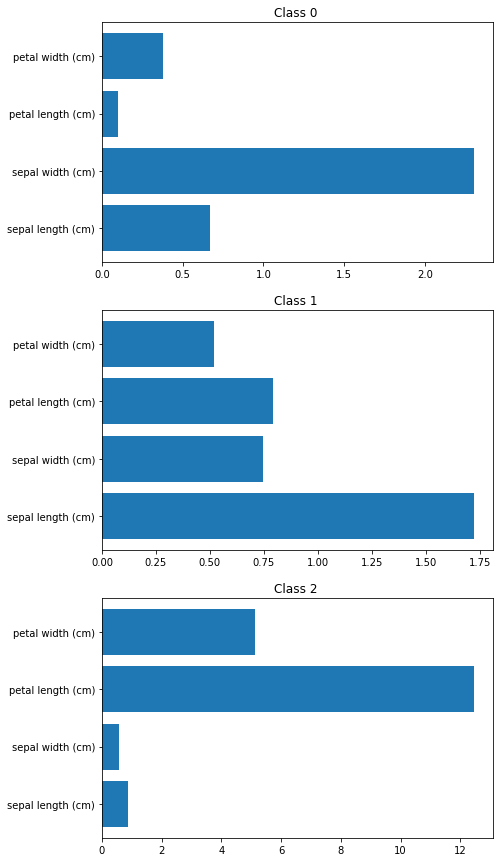

In [32]:
fig = plt.figure(figsize = (7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i + 1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y = dataset.feature_names, width = odds_ratio)
    ax.set_title('Class {} '.format(i))

In [33]:
print('重み(係数):', log_reg.coef_[0])
print('オッズ比:', np.exp(log_reg.coef_[0]))

重み(係数): [-0.39765925  0.83421173 -2.28946117 -0.97844057]
オッズ比: [0.67189094 2.30299796 0.10132104 0.37589683]


In [34]:
log_reg.predict([x_test[0]])

array([2])

In [36]:
log_reg.predict_proba([x_test[0]])

array([[1.31683748e-04, 5.98482489e-02, 9.40020067e-01]])

In [38]:
df = pd.read_csv('./classification_imb.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,...,4,3,9,0,1,1,0,1,0,1
1,1,3,8,0,0,1,0,0,0,0,...,3,3,8,0,1,1,1,1,0,1
2,2,1,1,1,0,0,0,0,1,0,...,1,2,8,0,1,1,1,0,0,1
3,5,1,9,0,0,1,0,0,0,0,...,1,3,8,0,1,1,0,0,0,1
4,0,1,2,0,0,1,0,0,0,0,...,0,3,6,0,1,0,1,0,1,1


In [39]:
df.shape

(29760, 58)

<AxesSubplot:xlabel='Target', ylabel='count'>

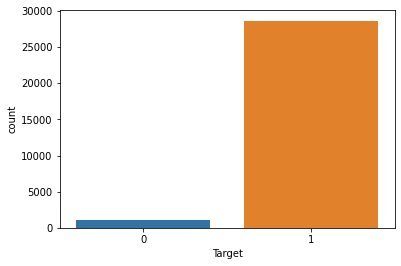

In [40]:
sns.countplot(x = 'Target', data = df)

In [41]:
x = df.drop('Target', axis = 1).values
t = df['Target'].values

print(x.shape, t.shape)

(29760, 57) (29760,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size = 0.3, random_state = 0)

In [59]:
log_reg = LogisticRegression(max_iter = 1600)

In [60]:
log_reg.fit(x_train, t_train)

print(log_reg.score(x_train, t_train))
print(log_reg.score(x_test, t_test))

0.9632776497695853
0.961581541218638


In [61]:
y_predict = log_reg.predict(x_test)

In [62]:
np.unique(y_predict)

array([1])

In [63]:
np.unique(t_test, return_counts = True)

(array([0, 1]), array([ 343, 8585]))

In [64]:
from sklearn import metrics

In [65]:
labels = list(np.unique(t_train))
labels

[0, 1]

In [66]:
confusion_matrix = metrics.confusion_matrix(t_test, y_predict)
confusion_matrix

array([[   0,  343],
       [   0, 8585]])

<AxesSubplot:>

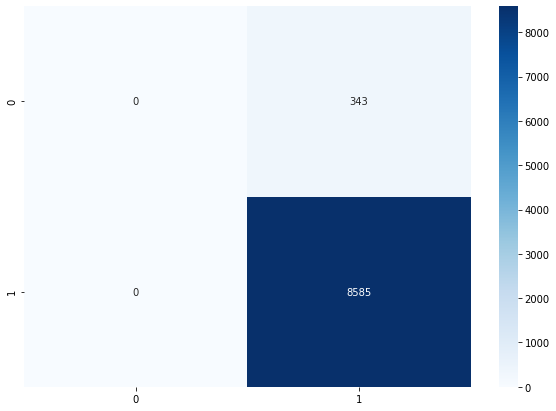

In [67]:
plt.figure(figsize = (10, 7))
sns.heatmap(confusion_matrix, annot = True, fmt = '.0f', cmap = 'Blues')

In [68]:
precision = metrics.precision_score(t_test, y_predict, average = None)
precision

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.96158154])

In [69]:
recall = metrics.recall_score(t_test, y_predict, average = None)
recall

array([0., 1.])

In [70]:
f1_score = metrics.f1_score(t_test, y_predict, average = None)
f1_score

array([0.        , 0.98041455])

In [71]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_predict)

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

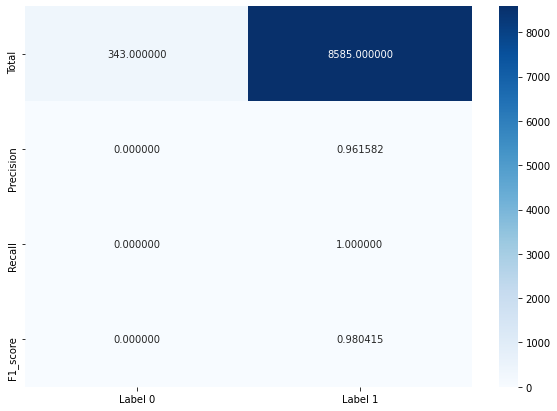

In [72]:
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index = ['Total', 'Precision', 'Recall', 'F1_score'],
    columns = ['Label 0', 'Label 1'])

plt.figure(figsize = (10, 7))
sns.heatmap(df_total, annot = True, fmt = '.6f', cmap = 'Blues')